In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import make_blobs
# https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python# 
# Code source: Gaël Varoquaux
# License: BSD 3 clause

### The Basics / Visualizing Decision Boundary

In [1]:
#Create synthetic dataset
X,y = make_blobs(n_samples=20, centers=2, random_state=0,cluster_std=1.3) 
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")

#Create an svm model
#clf = svm.SVC(kernel='linear',C=10)
clf = svm.SVC(kernel = 'linear')
clf.fit(X, y)
ax = plt.gca()      #get current axes

#get the current x,y-axis limits in data coordinates
xlim = ax.get_xlim() 
ylim = ax.get_ylim()
x_min, x_max = xlim[0] - 0.5, xlim[1] + 0.5
y_min, y_max = ylim[0] - 0.5, ylim[1] + 0.5
#Use mgrid to plot a dense multidimensional meshgrid
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
xy = np.c_[XX.ravel(), YY.ravel()]
Z = clf.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors=['k','k','k'], alpha=1,levels=[-1,0,1],linestyles=['--', '-', '--'])
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.show()

NameError: name 'make_blobs' is not defined

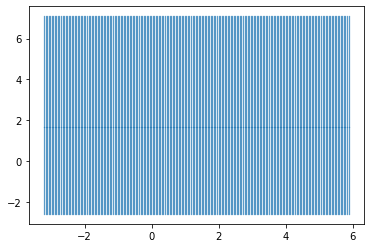

In [5]:
plt.scatter(xy[:,0],xy[:,1],s=0.1)

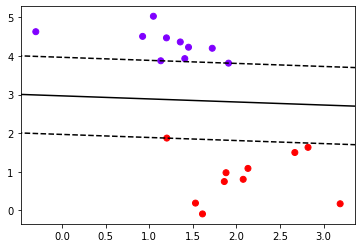

In [10]:
X,y = make_blobs(n_samples=20, centers=2, random_state=0,cluster_std=0.5) 
y = 2*y-1
model = svm.SVC(kernel='linear')
clf = model.fit(X, y)
plt.scatter(X[:,0],X[:,1],c=y,cmap='rainbow')

#get the current axes instance on the current figure
ax = plt.gca()
#get the current x,y-axis limits in data coordinates
xlim = ax.get_xlim() 
ylim = ax.get_ylim()
x_min, x_max = xlim[0] - 0.5, xlim[1] + 0.5
y_min, y_max = ylim[0] - 0.5, ylim[1] + 0.5
# the step length is a complex number (e.g. 5j), 
# the integer part of its magnitude is interpreted as 
# specifying the number of points to create between the start and stop values, 
# where the stop value is inclusive.
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
# Translates slice objects to concatenation along the second axis.
xy = np.c_[XX.ravel(), YY.ravel()]
Z = clf.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors=['k','k','k'], alpha=1,levels=[-1,0,1],linestyles=['--', '-', '--'])
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.show()

### Classify New Instances

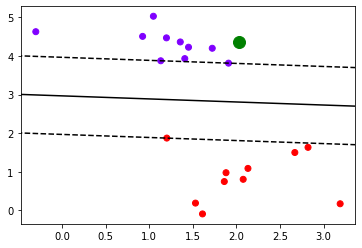

[-1]


In [13]:
#Toggle the x_test points below to see how the classifier works on new instances
x_test=[xlim[0]+2.5,xlim[1]+1]
#x_test = [2.5, 1]

plt.scatter(X[:,0],X[:,1],c=y,cmap='rainbow')
#get the current axes instance on the current figure
ax = plt.gca()
#get the current x,y-axis limits in data coordinates
xlim = ax.get_xlim() 
ylim = ax.get_ylim()
x_min, x_max = xlim[0] - 0.5, xlim[1] + 0.5
y_min, y_max = ylim[0] - 0.5, ylim[1] + 0.5
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
xy = np.c_[XX.ravel(), YY.ravel()]
Z = clf.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors=['k','k','k'], alpha=1,levels=[-1,0,1],linestyles=['--', '-', '--'])
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.gca()

plt.plot(x_test[0],x_test[1],'go',linewidth=2, markersize=12)     #green dot
plt.show()
y_pred = clf.predict([x_test])
print(y_pred)

### Visualizing Support Vectors 
Reference: Christian Versloot, "How to visualize support vectors of your SVM classifier?" https://www.machinecurve.com/index.php/2020/05/05/how-to-visualize-support-vectors-of-your-svm-classifier/#visualizing-your-svms-support-vectors

Support vector indices: [ 2  4 17]
Support vectors per class: [2 1] 



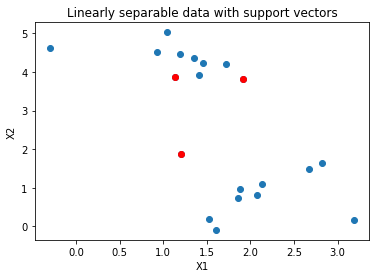

In [18]:
# Initialize SVM classifier
clf = svm.SVC(kernel='linear')

# Fit data
clf = clf.fit(X, y)

# Get support vector indices
support_vector_indices = clf.support_
print('Support vector indices:', support_vector_indices)

# Get number of support vectors per class
support_vectors_per_class = clf.n_support_
print('Support vectors per class:', support_vectors_per_class, '\n')

#Get the support vectors
support_vectors = clf.support_vectors_

# Visualize support vectors
plt.scatter(X[:,0], X[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### Kernel Types

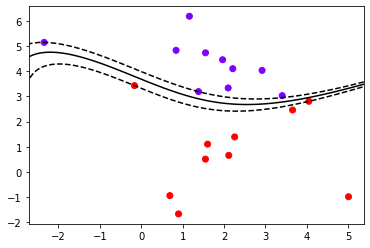

In [33]:
#Kernel Types
X,y = make_blobs(n_samples=20, centers=2, random_state=0,cluster_std=1.3) 
y = 2*y-1
model = svm.SVC(kernel='poly',C=10)
clf = model.fit(X, y)
plt.scatter(X[:,0],X[:,1],c=y,cmap='rainbow')

#get the axes instance on the current figure
ax = plt.gca()

#get the current x,y-axis limits in data coordinates
xlim = ax.get_xlim() 
ylim = ax.get_ylim()
x_min, x_max = xlim[0] - 0.5, xlim[1] + 0.5
y_min, y_max = ylim[0] - 0.5, ylim[1] + 0.5

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
xy = np.c_[XX.ravel(), YY.ravel()]
Z = clf.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors=['k','k','k'], alpha=1,levels=[-1,0,1],linestyles=['--', '-', '--'])
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.show()

### Cross-validation Using Cancer Dataset

In [39]:
from sklearn.preprocessing import StandardScaler
data = datasets.load_breast_cancer()
X = data.data
y = data.target

X = StandardScaler().fit_transform(X)
print(np.unique(y))
print(X.shape)

[0 1]
(569, 30)


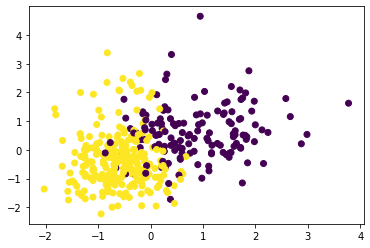

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3,random_state=420) 
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)

In [44]:
for kernel in ('linear', 'poly', 'rbf', 'sigmoid'):
  clf = svm.SVC(kernel=kernel) # Linear Kernel
  #Train the model using the training sets
  clf.fit(X_train, Y_train)
  #Predict the response for test dataset
  y_pred = clf.predict(X_test)
  print(kernel, "Accuracy:",metrics.accuracy_score(Y_test, y_pred))

linear Accuracy: 0.9766081871345029
poly Accuracy: 0.9005847953216374
rbf Accuracy: 0.9707602339181286
sigmoid Accuracy: 0.9532163742690059


### Use Cross-validation to Tune SVM Hyperparameters

In [52]:
from sklearn.model_selection import GridSearchCV

gamma_range = np.logspace(-4,1,5)
C_range = np.linspace(1,10,10)
param_grid = dict(gamma = gamma_range,C = C_range)

grid = GridSearchCV(svm.SVC(kernel = "rbf", cache_size=5000), param_grid=param_grid, cv=10)
grid.fit(X_train, Y_train)
print("The best parameters are %s \nwith a score of %0.5f" % (grid.best_params_, grid.best_score_))

grid.score(X_test,Y_test)

The best parameters are {'C': 10.0, 'gamma': 0.0017782794100389228} 
with a score of 0.98244


0.9590643274853801

In [53]:
from sklearn.metrics import mean_squared_error

clf = svm.SVC(kernel='rbf', gamma=0.0017782794100389228,C=10.0)
c = clf.fit(X_train,Y_train)

print('Classifier score: ', clf.score(X_test,Y_test))
y = c.predict(X_test)
print('Classifier MSE: ',mean_squared_error(y,Y_test))

Classifier score:  0.9590643274853801
Classifier MSE:  0.04093567251461988
